In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation
import sys

# adding Folder_2 to the system path
sys.path.insert(0, 'lib')

from lib.camera import Camera
from lib.json_parser import CameraJSONParser

def imshow(im, figsize=(9, 9), ticks:bool=False, **kwargs):
    plt.figure(figsize=figsize)
    if ticks is False:
        plt.xticks([])
        plt.yticks([])
    plt.imshow(im, **kwargs)
    
def show_vertices(vertices, size=5, color=(1, 0, 0)):
    plt.scatter(vertices[:, 0], vertices[:, 1], s=size, color=color)

In [9]:
head_vertices = np.loadtxt('lib/head_vertices.txt')

In [10]:
camera_request = {
         "name": "camera_1",
         "type": "perspective",
         "wavelength_kind": "rgb",
         "location": {
            "x": 0.0,
            "y": -1.6,
            "z": 0.12
         },
         "orientation": {
            "rotation": {
               "yaw": 20.0,
               "pitch": -10.0,
               "roll": 40.0
            },
         },
         "aspect_px": {
            "width": 1.0,
            "height": 1.0
         },
         "resolution_px": {
            "width": 256.0,
            "height": 256.0
         },
         "fov": {
            "horizontal": 50.0,
            "vertical": 50.0
         },
         "sensor": {
            "width": 46.63,
            "height": 46.63
         },
      }

100.0% of the head is in the frame


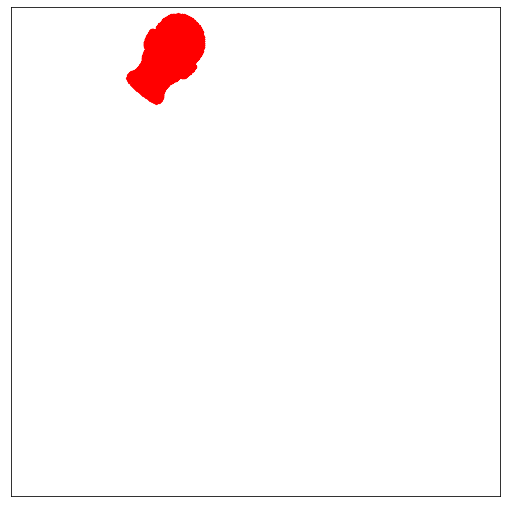

In [11]:
camera = CameraJSONParser().get_camera(camera_request)
pixels = camera.coordinates_to_pixel_space(head_vertices)
in_frame = camera.get_pixels_in_frame(pixels)

fraction_head_in_frame = in_frame.mean()
print(f"{fraction_head_in_frame*100:0.1f}% of the head is in the frame")

imshow(np.ones((256, 256, 3)))
show_vertices(pixels[in_frame])

96.4% of the head is in the frame


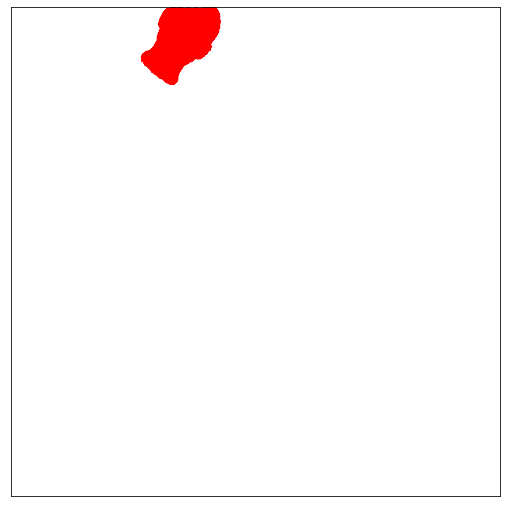

In [12]:
camera_request['location']['z'] = 0.05

camera = CameraJSONParser().get_camera(camera_request)
pixels = camera.coordinates_to_pixel_space(head_vertices)
in_frame = camera.get_pixels_in_frame(pixels)

fraction_head_in_frame = in_frame.mean()
print(f"{fraction_head_in_frame*100:0.1f}% of the head is in the frame")

imshow(np.ones((256, 256, 3)))
show_vertices(pixels[in_frame])

77.4% of the head is in the frame


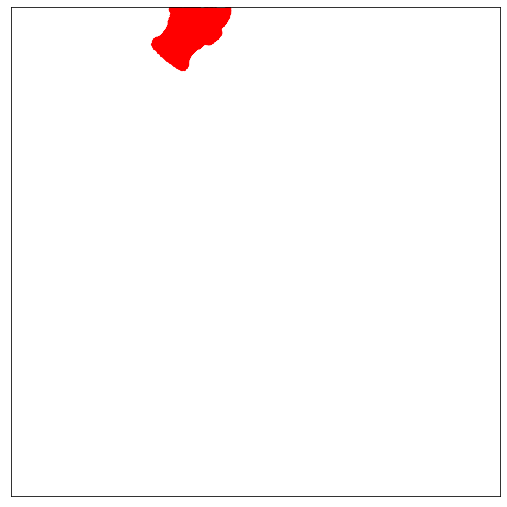

In [13]:
camera_request['location']['z'] = 0.0

camera = CameraJSONParser().get_camera(camera_request)
pixels = camera.coordinates_to_pixel_space(head_vertices)
in_frame = camera.get_pixels_in_frame(pixels)

fraction_head_in_frame = in_frame.mean()
print(f"{fraction_head_in_frame*100:0.1f}% of the head is in the frame")

imshow(np.ones((256, 256, 3)))
show_vertices(pixels[in_frame])

7.5% of the head is in the frame


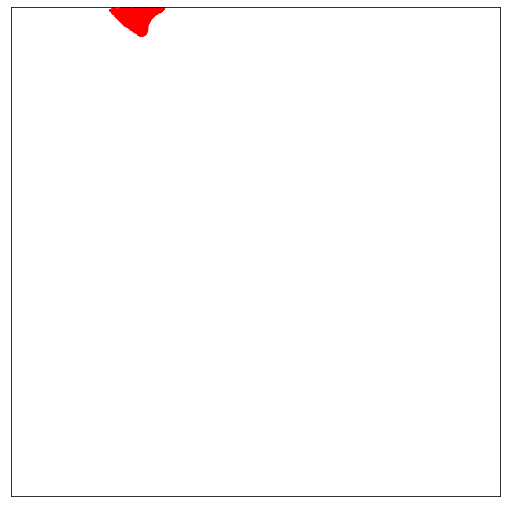

In [14]:
camera_request['orientation']['rotation']['yaw'] = 25

camera = CameraJSONParser().get_camera(camera_request)
pixels = camera.coordinates_to_pixel_space(head_vertices)
in_frame = camera.get_pixels_in_frame(pixels)

fraction_head_in_frame = in_frame.mean()
print(f"{fraction_head_in_frame*100:0.1f}% of the head is in the frame")

imshow(np.ones((256, 256, 3)))
show_vertices(pixels[in_frame])